In [0]:
# import tensorflow 
import tensorflow as tf 

# define a tensorflow constant 
a = tf.constant(1)

# print the type 
#print(type(a))

# creating arrays and converting them to tensors.
b = tf.constant([1 , 4, 555, 650])

# print the tensor array type 
#print(type(b))

# define constant tensors
c = tf.constant(4)
d = tf.constant(6)
# Multiply the tensors
e = c * d
print(type(e))

<class 'tensorflow.python.framework.ops.Tensor'>


In [0]:
import tensorflow as tf
# Create TensorFlow object called hello_constant
hello_constant = tf.constant('Hello World!')
# create a tensorflow session.
with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

In [0]:
import tensorflow as tf
# Create TensorFlow object called hello_constant
c = tf.constant(4)
d = tf.constant(7)

e = c * d
# create a tensorflow session.
with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(e)
    print(output)

28


In [0]:
import tensorflow as tf
# Creating the placeholder 
x = tf.placeholder(tf.string)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Hello PES Mandya'})
    print(output)

Hello PES Mandya


In [0]:
import tensorflow as tf
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)
with tf.Session() as sess:
    output = sess.run([x,y,z], feed_dict={x: 'Test String', y: 123, 
                                          z: 45.67})
    print(output)

[array('Test String', dtype=object), array(123, dtype=int32), array(45.67, dtype=float32)]


In [0]:
import tensorflow as tf

# Adding two integers using tf.add
x = tf.add(5, 2)

# Create a session to evaluate x
with tf.Session() as sess:
  print(sess.run(x))

7


##Create two placeholders representing integers and multiply both using tf.multiply. Create a session and run supply the values using runtime

In [0]:
import tensorflow as tf

# Create two placeholders
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

# Create a placeholder for multiplying
z = tf.multiply(x , y)

# Create a session to evaluate x and y
with tf.Session() as sess:
  output = sess.run(z, feed_dict={x : 5, y : 6})
  print(output)

30


Iteration: 0001 cost= 0.321723431 W= 0.30543876 b= -0.05763498
Tuning completed: cost= 0.227037847 W= 0.67622584 b= -0.009194074
Testing data cost: 0.15530913


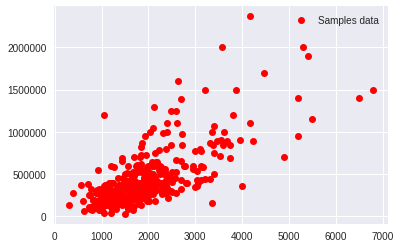

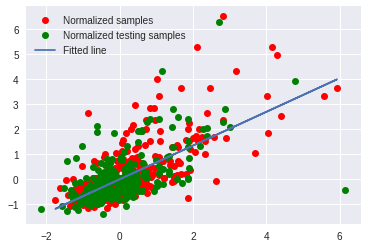

In [0]:
import tensorflow as tf
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Train a data set

data = pd.read_csv("https://goo.gl/PQXxZ8")
size_data = data["Size"].values
price_data = data["Price"].values

size_data, size_data_test, price_data, price_data_test = train_test_split(
     size_data, price_data, test_size=0.33, random_state=42)
# Test a data set


def normalize(array): 
    return (array - array.mean()) / array.std()

# Normalize a data set

size_data_n = normalize(size_data)
price_data_n = normalize(price_data)

size_data_test_n = normalize(size_data_test)
price_data_test_n = normalize(price_data_test)

# Display a plot
plt.plot(size_data, price_data, 'ro', label='Samples data')
plt.legend()
plt.draw()

samples_number = price_data_n.size

# TF graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Create a model

# Set model weights
W = tf.Variable(numpy.random.randn(), name="weight")
b = tf.Variable(numpy.random.randn(), name="bias")

# Set parameters
learning_rate = 0.1
training_iteration = 20

# Construct a linear model
model = tf.add(tf.multiply(X, W), b)

# Minimize squared errors
cost_function = tf.reduce_sum(tf.pow(model - Y, 2))/(2 * samples_number) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function) #Gradient descent

# Initialize variables
init = tf.initialize_all_variables()

# Launch a graph
with tf.Session() as sess:
    sess.run(init)

    display_step = 20
    # Fit all training data
    for iteration in range(training_iteration):
        for (x, y) in zip(size_data_n, price_data_n):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per iteration step
        if iteration % display_step == 0:
            print "Iteration:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(sess.run(cost_function, feed_dict={X:size_data_n, Y:price_data_n})),\
            "W=", sess.run(W), "b=", sess.run(b)
            
    tuning_cost = sess.run(cost_function, feed_dict={X: normalize(size_data_n), Y: normalize(price_data_n)})
            
    print "Tuning completed:", "cost=", "{:.9f}".format(tuning_cost), "W=", sess.run(W), "b=", sess.run(b)
    
    # Validate a tuning model
    
    testing_cost = sess.run(cost_function, feed_dict={X: size_data_test_n, Y: price_data_test_n})
    
    print "Testing data cost:" , testing_cost
    
    # Display a plot
    plt.figure()
    plt.plot(size_data_n, price_data_n, 'ro', label='Normalized samples')
    plt.plot(size_data_test_n, price_data_test_n, 'go', label='Normalized testing samples')
    plt.plot(size_data_n, sess.run(W) * size_data_n + sess.run(b), label='Fitted line')
    plt.legend()
    
    plt.show()

('Length of the training data: ', 521)
('Length of the testing data: ', 258)
Iteration: 0001 cost= Tuning completed: cost= 0.243420109
a= 0.568231 b= -0.07795709
Testing data cost: 0.14779551


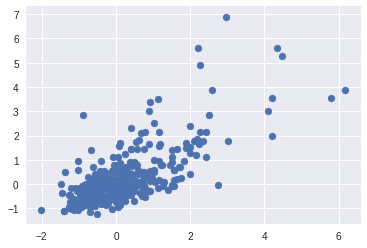

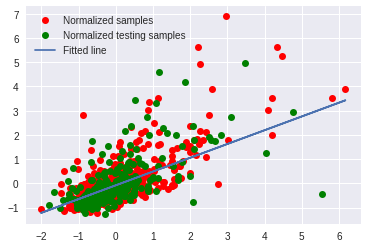

In [0]:
import pandas as pd



def read_data():
  """
  read the CSV data 
  """
  data = pd.read_csv("https://goo.gl/PQXxZ8")
  size_data = data["Size"].values
  price_data = data["Price"].values
  return size_data, price_data

# import library to split the data
from sklearn.model_selection import train_test_split

def split_test_train(size, price):
  # split the data, test size = 33%
  size_train, size_test, price_train, price_test = train_test_split(size, price, test_size=0.33)
  return size_train, size_test, price_train, price_test
  
# Normalize a data set
def normalize(array): 
    return (array - array.mean()) / array.std()

# read the data from the csv file.
size, price = read_data()
# split the data into testing and training set.
size_train, size_test, price_train,price_test = split_test_train(size, price)
# print the length of test and train dataset.
print("Length of the training data: ", len(size_train))
print("Length of the testing data: ", len(size_test))

%matplotlib inline
import matplotlib.pyplot as plt

# normalize the data
size_train = normalize(size_train)
price_train = normalize(price_train)

size_test = normalize(size_test)
price_test = normalize(price_test)

# plot the normalized data
plt.scatter(size_train, price_train, label='Samples data')
plt.draw()

samples_number = price_train.size

import tensorflow as tf
import numpy as np
 

def get_model_tensors():
  """
  function obtain model tensor
  """
  X = tf.placeholder("float")
  Y = tf.placeholder("float")
  # Create a model
  a = tf.Variable(np.random.randn(), name="weight")
  b = tf.Variable(np.random.randn(), name="bias")
  model = tf.add(tf.multiply(X, a), b)
  return X, Y, a, b, model

def get_cost_optimizer_tensor(Y, model, size, learning_rate):
  # cost function tensor.
  cost_function = tf.reduce_sum(tf.pow(model - Y, 2))/(2 * size) 
  # gradient descent tensor.
  gradient_descent = tf.train.GradientDescentOptimizer(learning_rate) 
  # optimization tensor.
  optimizer = gradient_descent.minimize(cost_function)
  return optimizer, cost_function
  
# Set parameters
learning_rate = 0.1
training_iteration = 200

X, Y, a, b, model = get_model_tensors()

optimizer, cost_function = get_cost_optimizer_tensor(Y, model,len(size_train), learning_rate )



# Initialize variables
init = tf.initialize_all_variables()

# Launch a graph
with tf.Session() as sess:
    sess.run(init)

    display_step = 200
    # Fit all training data
    for iteration in range(training_iteration):
        for (x, y) in zip(size_train, price_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per iteration step
        if iteration % display_step == 0:
            print "Iteration:", '%04d' % (iteration + 1), "cost=", 
            "{:.9f}".format(sess.run(cost_function, feed_dict={X:size_train, Y:price_train})),\
            "a=", sess.run(a), "b=", sess.run(b)
            
    tuning_cost = sess.run(cost_function, feed_dict={X: normalize(size_train), Y: normalize(price_train)})
            
    print "Tuning completed:", "cost=", "{:.9f}\n".format(tuning_cost), "a=", sess.run(a), "b=", sess.run(b)
    
    # Validate a tuning model
    
    testing_cost = sess.run(cost_function, feed_dict={X: size_test, Y: price_test})
    
    print "Testing data cost:" , testing_cost
    
    # Display a plot
    plt.figure()
    plt.plot(size_train, price_train, 'ro', label='Normalized samples')
    plt.plot(size_test, price_test, 'go', label='Normalized testing samples')
    plt.plot(size_train, sess.run(a) * size_train + sess.run(b), label='Fitted line')
    plt.legend()
    
    plt.show()
    
    